In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [2]:
from thinning import sample_hawkes_process_thinning_true_vectorised
from utils import exp_kernel_vectorised, constant_background, plot_counting_process
from mle import log_likelihood, optimise_params, optimise_params_general, sum_log_likelihood

In [3]:
np.random.SeedSequence()

SeedSequence(
    entropy=255045855415480637478905110258420316551,
)

## MLE for repeated sampling

In [4]:
max_T = 100
num_samples = 50
hawkes_realisations = []

# master_seed = 10180838360946495019305780749540050802
master_seed = 231298400240332049519891427361305694045
seed_seq_master = np.random.SeedSequence(master_seed)

for i in range(num_samples):

    child_seed = seed_seq_master.spawn(1)[0]

    hawkes_realisation = sample_hawkes_process_thinning_true_vectorised(max_T, constant_background, exp_kernel_vectorised, seed=child_seed)
    hawkes_realisations.append(hawkes_realisation)

In [5]:
param_estimates = np.zeros((num_samples, 3))

In [6]:
starting_values = [0.5, 0.5, 0.5]

for i in range(num_samples):
    print(i)
    data = hawkes_realisations[:i+1], max_T
    neg_log_likelihood_fct = lambda params: -sum_log_likelihood(params, data=data)
    current_params, _ = optimise_params_general(neg_log_likelihood_fct, starting_values, 1e-6)
    param_estimates[i, :] = current_params

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


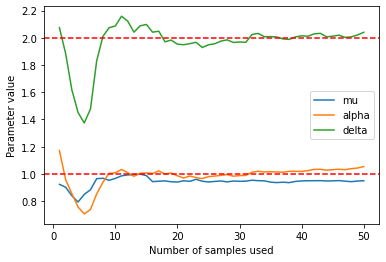

In [7]:
plt.plot(range(1, num_samples+1), param_estimates, label=['mu', 'alpha', 'delta'])
plt.legend()
plt.xlabel('Number of samples used')
plt.ylabel('Parameter value')
plt.axhline(2, linestyle='dashed', color='red')
plt.axhline(1, linestyle='dashed', color='red')
# plt.title(f'Starting values ${starting_values}$')
plt.show()

More variability for fewer samples, as more are used estimates settle to be very close to true value.

In [188]:
starting_values = [1, 0.1, 1]

for i in range(num_samples):
    print(i)
    data = hawkes_realisations[:i+1], max_T
    neg_log_likelihood_fct = lambda params: -sum_log_likelihood(params, data=data)
    current_params, _ = optimise_params_general(neg_log_likelihood_fct, starting_values, 1e-6)
    param_estimates[i, :] = current_params

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


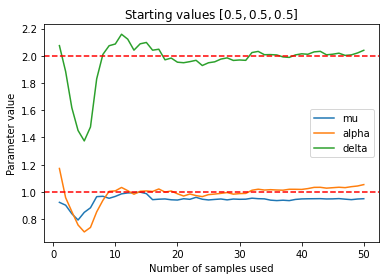

In [8]:
plt.plot(range(1, num_samples+1), param_estimates, label=['mu', 'alpha', 'delta'])
plt.legend()
plt.xlabel('Number of samples used')
plt.ylabel('Parameter value')
plt.axhline(2, linestyle='dashed', color='red')
plt.axhline(1, linestyle='dashed', color='red')
plt.title(f'Starting values ${starting_values}$')
plt.show()

In [190]:
starting_values = [2, 2, 2]

for i in range(num_samples):
    print(i)
    data = hawkes_realisations[:i+1], max_T
    neg_log_likelihood_fct = lambda params: -sum_log_likelihood(params, data=data)
    current_params, _ = optimise_params_general(neg_log_likelihood_fct, starting_values, 1e-6)
    param_estimates[i, :] = current_params

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


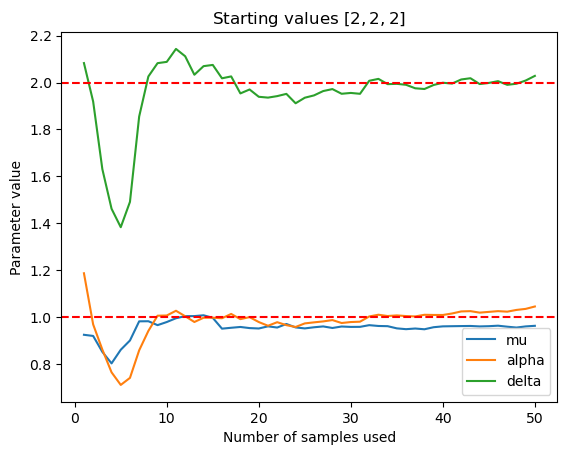

In [191]:
plt.plot(range(1, num_samples+1), param_estimates, label=['mu', 'alpha', 'delta'])
plt.legend()
plt.xlabel('Number of samples used')
plt.ylabel('Parameter value')
plt.axhline(2, linestyle='dashed', color='red')
plt.axhline(1, linestyle='dashed', color='red')
plt.title(f'Starting values ${starting_values}$')
plt.show()

Provided in right ballpark, choice of starting value does not matter as much.

In [14]:
starting_values = [10, 10, 10]

for i in range(num_samples):
    print(i)
    data = hawkes_realisations[:i+1], max_T
    neg_log_likelihood_fct = lambda params: -sum_log_likelihood(params, data=data)
    current_params, _ = optimise_params_general(neg_log_likelihood_fct, starting_values, 1e-6)
    param_estimates[i, :] = current_params

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


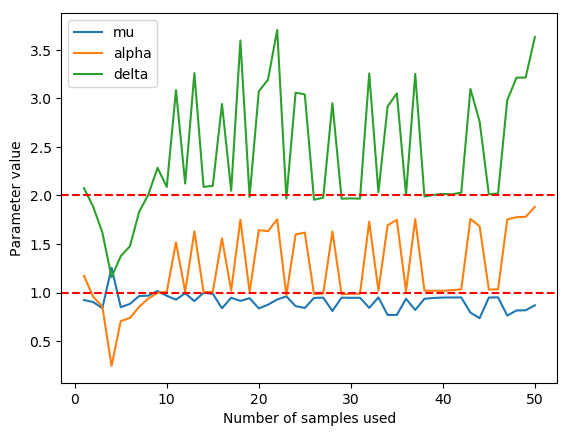

In [20]:
plt.plot(range(1, num_samples+1), param_estimates[:, 0], label='mu')
plt.plot(range(1, num_samples+1), param_estimates[:, 1], label='alpha')
plt.plot(range(1, num_samples+1), param_estimates[:, 2], label='delta')
plt.legend()
plt.xlabel('Number of samples used')
plt.ylabel('Parameter value')
plt.axhline(2, linestyle='dashed', color='red')
plt.axhline(1, linestyle='dashed', color='red')
# plt.title(f'Starting values ${starting_values}$')
plt.show()

## How does increasing period of observation affect MLE?

In [9]:
max_T = 1000
num_samples = 50
hawkes_realisations = []

master_seed = 27367346171953635880980835800904027217
seed_seq_master = np.random.SeedSequence(master_seed)

for i in range(num_samples):
    print(i)

    child_seed = seed_seq_master.spawn(1)[0]

    hawkes_realisation = sample_hawkes_process_thinning_true_vectorised(max_T, constant_background, exp_kernel_vectorised, seed=child_seed)
    hawkes_realisations.append(hawkes_realisation)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


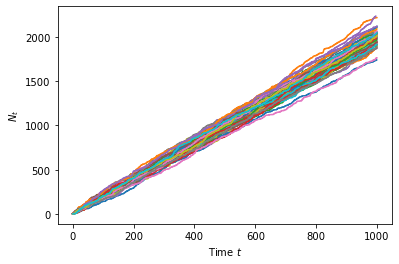

In [10]:
for h in hawkes_realisations:
    h = [0] + h
    counts = np.arange(len(h))
    plt.step(h, counts, where='post')
plt.xlabel("Time $t$")
plt.ylabel("$N_t$")
plt.show()

In [11]:
step = 100
max_T_vals = np.arange(step, max_T+step, step)
max_T_vals

array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000])

In [19]:
param_estimates = np.zeros((num_samples, len(max_T_vals), 3))

In [141]:
starting_values = [0.5,0.5,0.5]

for i, realisation in enumerate(hawkes_realisations):
    print(f"Starting MLE for realisation {i}")
    for j, T in enumerate(max_T_vals):
        index = np.searchsorted(realisation, T)
        data = realisation[:index-1], T
        current_params, _ = optimise_params(data, starting_values, 1e-6)
        param_estimates[i, j, :] = current_params

Starting MLE for realisation 0
Starting MLE for realisation 1
Starting MLE for realisation 2
Starting MLE for realisation 3
Starting MLE for realisation 4
Starting MLE for realisation 5
Starting MLE for realisation 6
Starting MLE for realisation 7
Starting MLE for realisation 8
Starting MLE for realisation 9
Starting MLE for realisation 10
Starting MLE for realisation 11
Starting MLE for realisation 12
Starting MLE for realisation 13
Starting MLE for realisation 14
Starting MLE for realisation 15
Starting MLE for realisation 16
Starting MLE for realisation 17
Starting MLE for realisation 18
Starting MLE for realisation 19
Starting MLE for realisation 20
Starting MLE for realisation 21
Starting MLE for realisation 22
Starting MLE for realisation 23
Starting MLE for realisation 24
Starting MLE for realisation 25
Starting MLE for realisation 26
Starting MLE for realisation 27
Starting MLE for realisation 28
Starting MLE for realisation 29
Starting MLE for realisation 30
Starting MLE for r

In [142]:
# Starting vals 0.5 for all
# max_T = 1000, step = 100
# seed = 27367346171953635880980835800904027217

# np.save('param_estimates_march11.npy', param_estimates)

In [12]:
param_estimates = np.load('param_estimates_march11.npy')

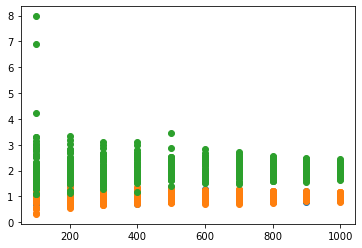

In [13]:
[plt.scatter(np.tile(max_T_vals, num_samples), param_estimates[:, :, i].ravel(), label=f'Parameter {i + 1}') for i in range(3)]

Bit messy, plot each parameter separately.

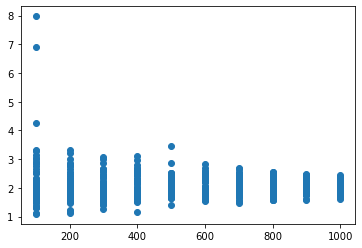

In [14]:
plt.scatter(np.tile(max_T_vals, num_samples), param_estimates[:, :, 2].ravel(), label=f'Parameter {i + 1}')

Do it neatly

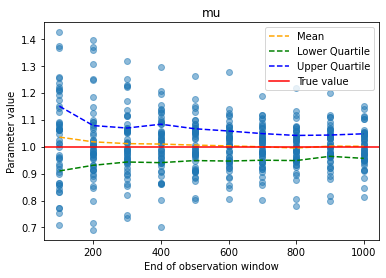

In [15]:
mean_values = np.mean(param_estimates[:, :, 0], axis=0)
lower_quartile_values = np.percentile(param_estimates[:, :, 0], 25, axis=0)
upper_quartile_values = np.percentile(param_estimates[:, :, 0], 75, axis=0)

plt.scatter(np.tile(max_T_vals, num_samples), param_estimates[:, :, 0].ravel(), alpha=0.5)
plt.plot(max_T_vals, mean_values, label='Mean', linestyle='--', color='orange')
plt.plot(max_T_vals, lower_quartile_values, label='Lower Quartile', linestyle='--', color='green')
plt.plot(max_T_vals, upper_quartile_values, label='Upper Quartile', linestyle='--', color='blue')
plt.axhline(1, label='True value', color='red')

plt.xlabel('End of observation window')
plt.ylabel('Parameter value')
#plt.title('Scatter Plot of Maximum Likelihood Estimates for $\mu$ over 50 samples')
plt.title("mu")
plt.legend()
plt.show()

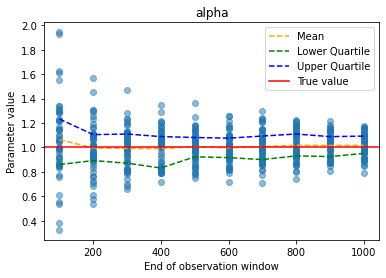

In [16]:
mean_values = np.mean(param_estimates[:, :, 1], axis=0)
lower_quartile_values = np.percentile(param_estimates[:, :, 1], 25, axis=0)
upper_quartile_values = np.percentile(param_estimates[:, :, 1], 75, axis=0)

plt.scatter(np.tile(max_T_vals, num_samples), param_estimates[:, :, 1].ravel(), alpha=0.5)
plt.plot(max_T_vals, mean_values, label='Mean', linestyle='--', color='orange')
plt.plot(max_T_vals, lower_quartile_values, label='Lower Quartile', linestyle='--', color='green')
plt.plot(max_T_vals, upper_quartile_values, label='Upper Quartile', linestyle='--', color='blue')
plt.axhline(1, label='True value', color='red')

plt.xlabel('End of observation window')
plt.ylabel('Parameter value')
# plt.title(r"Scatter Plot of Maximum Likelihood Estimates for $\alpha$ over 50 samples")
plt.title("alpha")
plt.legend()
plt.show()

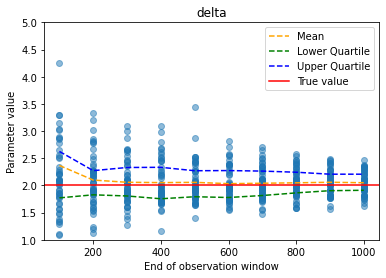

In [17]:
mean_values = np.mean(param_estimates[:, :, 2], axis=0)
lower_quartile_values = np.percentile(param_estimates[:, :, 2], 25, axis=0)
upper_quartile_values = np.percentile(param_estimates[:, :, 2], 75, axis=0)

plt.scatter(np.tile(max_T_vals, num_samples), param_estimates[:, :, 2].ravel(), alpha=0.5)
plt.plot(max_T_vals, mean_values, label='Mean', linestyle='--', color='orange')
plt.plot(max_T_vals, lower_quartile_values, label='Lower Quartile', linestyle='--', color='green')
plt.plot(max_T_vals, upper_quartile_values, label='Upper Quartile', linestyle='--', color='blue')
plt.axhline(2, label='True value', color='red')

plt.xlabel('End of observation window')
plt.ylabel('Parameter value')
plt.ylim(1,5)
#plt.title(r"Scatter Plot of Maximum Likelihood Estimates for $\delta$ over 50 samples")
plt.title('delta')
plt.legend()
plt.show()

## How does missing data affect MLE?

Regimes to try:
1. Missing uniformly at random
2. Missing more at the beginning
3. Missing more at the end

Strategy: associate to each event a uniform[0,1] realisation from a seeded rng. Then can choose different probabilities $p$ with which to remove data and can scale this smoothly (or even choose different regimes i.e. $p$ decays with time).

In [26]:
max_T = 100
num_samples = 50
hawkes_realisations = []

master_seed = 147638114224523897606519673211969767073
seed_seq_master = np.random.SeedSequence(master_seed)

for i in range(num_samples):

    child_seed = seed_seq_master.spawn(1)[0]

    hawkes_realisation = sample_hawkes_process_thinning_true_vectorised(max_T, constant_background, exp_kernel_vectorised, seed=child_seed)
    hawkes_realisations.append(hawkes_realisation)

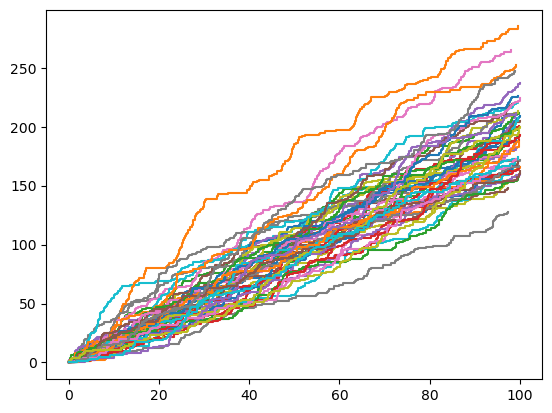

In [28]:
for h in hawkes_realisations:
    h = [0] + h
    counts = np.arange(len(h))
    plt.step(h, counts, where='post')
plt.show()

In [29]:
rng = np.random.default_rng(seed=master_seed)

random_label_lists = []

for realisation in hawkes_realisations:
    random_labels = rng.uniform(size=len(realisation))
    random_label_lists.append(random_labels)

In [31]:
# Check reproducibility

random_label_lists[30][52]

0.44591155413763317

Take one realisation and plot at different corruption thresholds.

NEW: added time interval for which to apply corruption

In [57]:
def corrupt_realisation(realisation, random_labels, p, time_start=0, time_end=np.inf):
    return [t for t, rand_num in zip(realisation, random_labels) if rand_num < p or (t < time_start or t > time_end)]

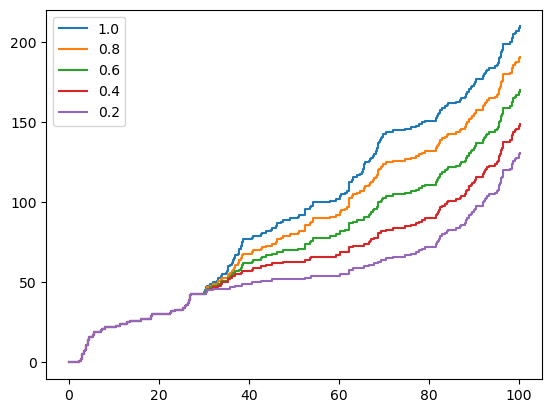

In [60]:
for p in np.arange(1.0, 0.0, -0.2):
    # h = [t for t, rand_num in zip(hawkes_realisations[0], random_label_lists[0]) if rand_num < p]
    h = corrupt_realisation(hawkes_realisations[0], random_label_lists[0], p, 30, 70)
    h = [0] + h
    counts = np.arange(len(h))
    plt.step(h, counts, where='post', label=f"{p:.1f}")
plt.legend()
plt.show()

In [61]:
step_size = 0.2
corruption_thresholds = np.arange(1.0, 0.0, -step_size)

In [62]:
param_estimates = np.zeros((num_samples, len(corruption_thresholds), 3))

In [63]:
starting_values = [0.5,0.5,0.5]

for i in range(num_samples):
    realisation = hawkes_realisations[i]
    random_labels = random_label_lists[i]
    print(f"Starting MLE for realisation {i}")
    for j, p in enumerate(corruption_thresholds):
        corrupted_realisation = corrupt_realisation(realisation, random_labels, p)
        data = corrupted_realisation, max_T
        current_params, _ = optimise_params(data, starting_values, 1e-6)
        param_estimates[i, j, :] = current_params

Starting MLE for realisation 0
Starting MLE for realisation 1
Starting MLE for realisation 2
Starting MLE for realisation 3
Starting MLE for realisation 4
Starting MLE for realisation 5
Starting MLE for realisation 6
Starting MLE for realisation 7
Starting MLE for realisation 8
Starting MLE for realisation 9
Starting MLE for realisation 10
Starting MLE for realisation 11
Starting MLE for realisation 12
Starting MLE for realisation 13
Starting MLE for realisation 14
Starting MLE for realisation 15
Starting MLE for realisation 16
Starting MLE for realisation 17
Starting MLE for realisation 18
Starting MLE for realisation 19
Starting MLE for realisation 20
Starting MLE for realisation 21
Starting MLE for realisation 22
Starting MLE for realisation 23
Starting MLE for realisation 24
Starting MLE for realisation 25
Starting MLE for realisation 26
Starting MLE for realisation 27
Starting MLE for realisation 28
Starting MLE for realisation 29
Starting MLE for realisation 30
Starting MLE for r

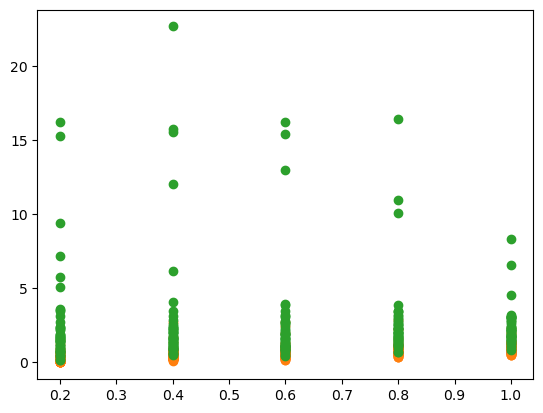

In [64]:
[plt.scatter(np.tile(corruption_thresholds, num_samples), param_estimates[:, :, i].ravel(), label=f'Parameter {i + 1}') for i in range(3)]

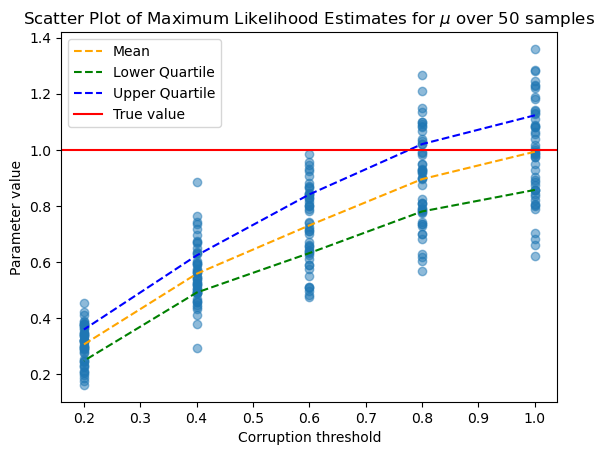

In [65]:
mean_values = np.mean(param_estimates[:, :, 0], axis=0)
lower_quartile_values = np.percentile(param_estimates[:, :, 0], 25, axis=0)
upper_quartile_values = np.percentile(param_estimates[:, :, 0], 75, axis=0)

plt.scatter(np.tile(corruption_thresholds, num_samples), param_estimates[:, :, 0].ravel(), alpha=0.5)
plt.plot(corruption_thresholds, mean_values, label='Mean', linestyle='--', color='orange')
plt.plot(corruption_thresholds, lower_quartile_values, label='Lower Quartile', linestyle='--', color='green')
plt.plot(corruption_thresholds, upper_quartile_values, label='Upper Quartile', linestyle='--', color='blue')
plt.axhline(1, label='True value', color='red')

plt.xlabel('Corruption threshold')
plt.ylabel('Parameter value')
plt.title('Scatter Plot of Maximum Likelihood Estimates for $\mu$ over 50 samples')
plt.legend()
plt.show()

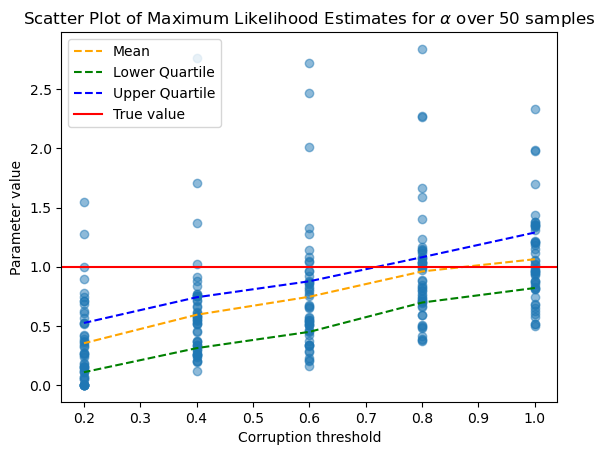

In [66]:
mean_values = np.mean(param_estimates[:, :, 1], axis=0)
lower_quartile_values = np.percentile(param_estimates[:, :, 1], 25, axis=0)
upper_quartile_values = np.percentile(param_estimates[:, :, 1], 75, axis=0)

plt.scatter(np.tile(corruption_thresholds, num_samples), param_estimates[:, :, 1].ravel(), alpha=0.5)
plt.plot(corruption_thresholds, mean_values, label='Mean', linestyle='--', color='orange')
plt.plot(corruption_thresholds, lower_quartile_values, label='Lower Quartile', linestyle='--', color='green')
plt.plot(corruption_thresholds, upper_quartile_values, label='Upper Quartile', linestyle='--', color='blue')
plt.axhline(1, label='True value', color='red')

plt.xlabel('Corruption threshold')
plt.ylabel('Parameter value')
plt.title(r'Scatter Plot of Maximum Likelihood Estimates for $\alpha$ over 50 samples')
plt.legend()
plt.show()

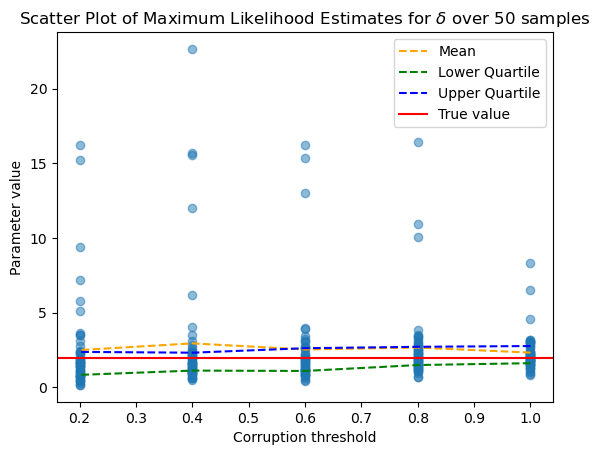

In [67]:
mean_values = np.mean(param_estimates[:, :, 2], axis=0)
lower_quartile_values = np.percentile(param_estimates[:, :, 2], 25, axis=0)
upper_quartile_values = np.percentile(param_estimates[:, :, 2], 75, axis=0)

plt.scatter(np.tile(corruption_thresholds, num_samples), param_estimates[:, :, 2].ravel(), alpha=0.5)
plt.plot(corruption_thresholds, mean_values, label='Mean', linestyle='--', color='orange')
plt.plot(corruption_thresholds, lower_quartile_values, label='Lower Quartile', linestyle='--', color='green')
plt.plot(corruption_thresholds, upper_quartile_values, label='Upper Quartile', linestyle='--', color='blue')
plt.axhline(2, label='True value', color='red')

plt.xlabel('Corruption threshold')
plt.ylabel('Parameter value')
plt.title(r'Scatter Plot of Maximum Likelihood Estimates for $\delta$ over 50 samples')
plt.legend()
plt.show()

Interestingly the $\delta$ estimate is close even for extreme levels of corruption. Let's zoom in.

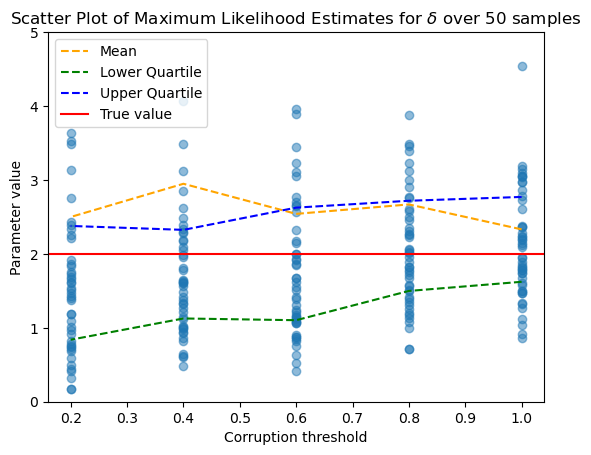

In [68]:
mean_values = np.mean(param_estimates[:, :, 2], axis=0)
lower_quartile_values = np.percentile(param_estimates[:, :, 2], 25, axis=0)
upper_quartile_values = np.percentile(param_estimates[:, :, 2], 75, axis=0)

plt.scatter(np.tile(corruption_thresholds, num_samples), param_estimates[:, :, 2].ravel(), alpha=0.5)
plt.plot(corruption_thresholds, mean_values, label='Mean', linestyle='--', color='orange')
plt.plot(corruption_thresholds, lower_quartile_values, label='Lower Quartile', linestyle='--', color='green')
plt.plot(corruption_thresholds, upper_quartile_values, label='Upper Quartile', linestyle='--', color='blue')
plt.axhline(2, label='True value', color='red')

plt.xlabel('Corruption threshold')
plt.ylabel('Parameter value')
plt.title(r'Scatter Plot of Maximum Likelihood Estimates for $\delta$ over 50 samples')
plt.legend()
plt.ylim(0, 5)
plt.show()

There are a lot of outliers, but still centred on true value. Why is this? Ah, I think the corruption is the equivalent to multiplying mu and alpha by the threshold, but keeping delta fixed. But still doesn't explain the outliers then...

Let's repeat experiment for larger max_T and let it run.

In [20]:
max_T = 1000
num_samples = 50
hawkes_realisations = []

master_seed = 147638114224523897606519673211969767073
seed_seq_master = np.random.SeedSequence(master_seed)

for i in range(num_samples):

    child_seed = seed_seq_master.spawn(1)[0]

    hawkes_realisation = sample_hawkes_process_thinning_true_vectorised(max_T, constant_background, exp_kernel_vectorised, seed=child_seed)
    hawkes_realisations.append(hawkes_realisation)

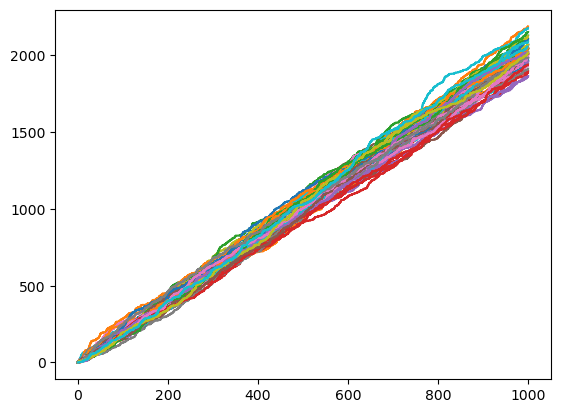

In [21]:
for h in hawkes_realisations:
    h = [0] + h
    counts = np.arange(len(h))
    plt.step(h, counts, where='post')
plt.show()

In [48]:
rng = np.random.default_rng(seed=master_seed)

random_label_lists = []

for realisation in hawkes_realisations:
    random_labels = rng.uniform(size=len(realisation))
    random_label_lists.append(random_labels)

In [22]:
step_size = 0.1
corruption_thresholds = np.arange(1.0, 0.0, -step_size)
param_estimates = np.zeros((num_samples, len(corruption_thresholds), 3))

In [293]:
starting_values = [0.5,0.5,0.5]

for i in range(num_samples):
    realisation = hawkes_realisations[i]
    random_labels = random_label_lists[i]
    print(f"Starting MLE for realisation {i}")
    for j, p in enumerate(corruption_thresholds):
        corrupted_realisation = corrupt_realisation(realisation, random_labels, p)
        data = corrupted_realisation, max_T
        current_params, _ = optimise_params(data, starting_values, 1e-6)
        param_estimates[i, j, :] = current_params

Starting MLE for realisation 0
Starting MLE for realisation 1
Starting MLE for realisation 2
Starting MLE for realisation 3
Starting MLE for realisation 4
Starting MLE for realisation 5
Starting MLE for realisation 6
Starting MLE for realisation 7
Starting MLE for realisation 8
Starting MLE for realisation 9
Starting MLE for realisation 10
Starting MLE for realisation 11
Starting MLE for realisation 12
Starting MLE for realisation 13
Starting MLE for realisation 14
Starting MLE for realisation 15
Starting MLE for realisation 16
Starting MLE for realisation 17
Starting MLE for realisation 18
Starting MLE for realisation 19
Starting MLE for realisation 20
Starting MLE for realisation 21
Starting MLE for realisation 22
Starting MLE for realisation 23
Starting MLE for realisation 24
Starting MLE for realisation 25
Starting MLE for realisation 26
Starting MLE for realisation 27
Starting MLE for realisation 28
Starting MLE for realisation 29
Starting MLE for realisation 30
Starting MLE for r

In [294]:
# Starting vals 0.5 for all
# max_T = 1000, step = 0.1
# seed = 147638114224523897606519673211969767073 # used for generating hawkes and random labels

# np.save('missing_data_param_estimates_march11.npy', param_estimates)

In [23]:
param_estimates = np.load('missing_data_param_estimates_march11.npy')

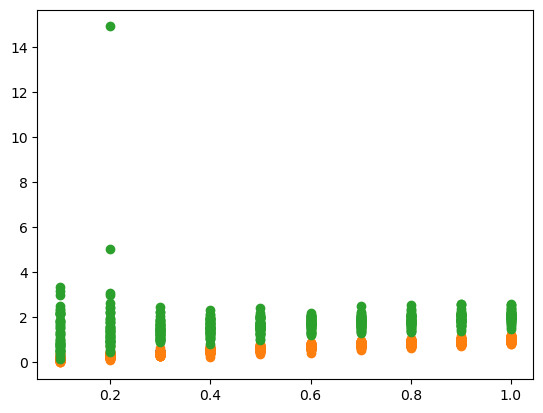

In [24]:
[plt.scatter(np.tile(corruption_thresholds, num_samples), param_estimates[:, :, i].ravel(), label=f'Parameter {i + 1}') for i in range(3)]

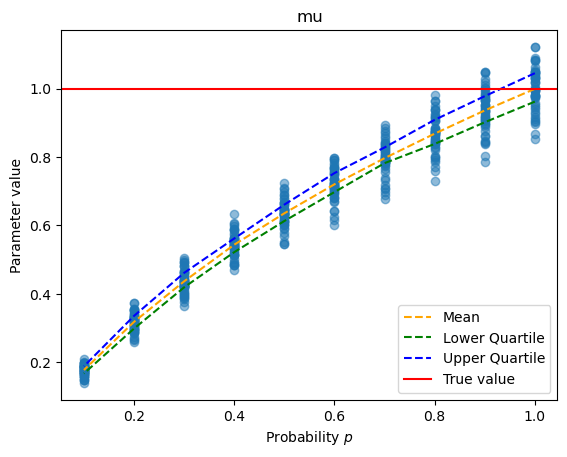

In [30]:
mean_values = np.mean(param_estimates[:, :, 0], axis=0)
lower_quartile_values = np.percentile(param_estimates[:, :, 0], 25, axis=0)
upper_quartile_values = np.percentile(param_estimates[:, :, 0], 75, axis=0)

plt.scatter(np.tile(corruption_thresholds, num_samples), param_estimates[:, :, 0].ravel(), alpha=0.5)
plt.plot(corruption_thresholds, mean_values, label='Mean', linestyle='--', color='orange')
plt.plot(corruption_thresholds, lower_quartile_values, label='Lower Quartile', linestyle='--', color='green')
plt.plot(corruption_thresholds, upper_quartile_values, label='Upper Quartile', linestyle='--', color='blue')
plt.axhline(1, label='True value', color='red')

plt.xlabel('Probability $p$')
plt.ylabel('Parameter value')
#plt.title('Scatter Plot of Maximum Likelihood Estimates for $\mu$ over 50 samples')
plt.title('mu')
plt.legend()
plt.show()

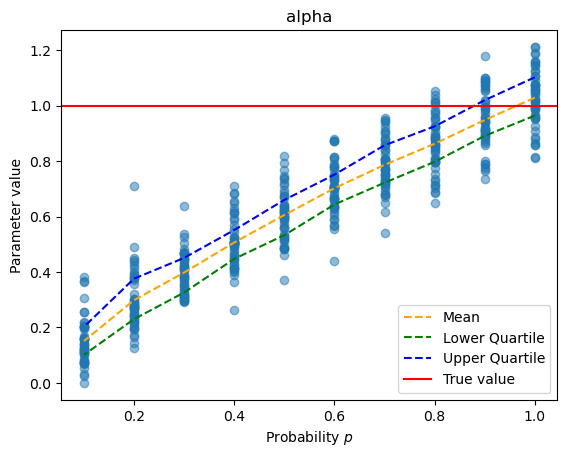

In [31]:
mean_values = np.mean(param_estimates[:, :, 1], axis=0)
lower_quartile_values = np.percentile(param_estimates[:, :, 1], 25, axis=0)
upper_quartile_values = np.percentile(param_estimates[:, :, 1], 75, axis=0)

plt.scatter(np.tile(corruption_thresholds, num_samples), param_estimates[:, :, 1].ravel(), alpha=0.5)
plt.plot(corruption_thresholds, mean_values, label='Mean', linestyle='--', color='orange')
plt.plot(corruption_thresholds, lower_quartile_values, label='Lower Quartile', linestyle='--', color='green')
plt.plot(corruption_thresholds, upper_quartile_values, label='Upper Quartile', linestyle='--', color='blue')
plt.axhline(1, label='True value', color='red')

plt.xlabel('Probability $p$')
plt.ylabel('Parameter value')
# plt.title(r'Scatter Plot of Maximum Likelihood Estimates for $\alpha$ over 50 samples')
plt.title('alpha')
plt.legend()
plt.show()

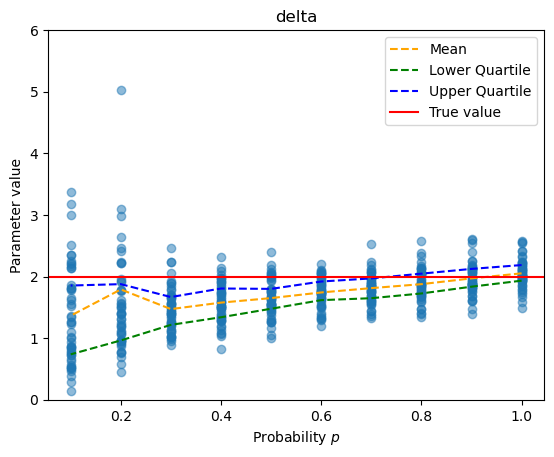

In [33]:
mean_values = np.mean(param_estimates[:, :, 2], axis=0)
lower_quartile_values = np.percentile(param_estimates[:, :, 2], 25, axis=0)
upper_quartile_values = np.percentile(param_estimates[:, :, 2], 75, axis=0)

plt.scatter(np.tile(corruption_thresholds, num_samples), param_estimates[:, :, 2].ravel(), alpha=0.5)
plt.plot(corruption_thresholds, mean_values, label='Mean', linestyle='--', color='orange')
plt.plot(corruption_thresholds, lower_quartile_values, label='Lower Quartile', linestyle='--', color='green')
plt.plot(corruption_thresholds, upper_quartile_values, label='Upper Quartile', linestyle='--', color='blue')
plt.axhline(2, label='True value', color='red')

plt.xlabel('Probability $p$')
plt.ylabel('Parameter value')
plt.ylim(0,6) # Removed outliers
# plt.title(r'Scatter Plot of Maximum Likelihood Estimates for $\delta$ over 50 samples')
plt.title('delta')
plt.legend()
plt.show()

Zoom in again

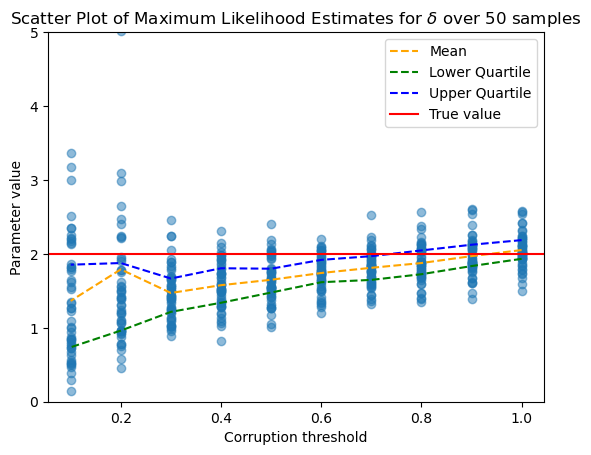

In [299]:
mean_values = np.mean(param_estimates[:, :, 2], axis=0)
lower_quartile_values = np.percentile(param_estimates[:, :, 2], 25, axis=0)
upper_quartile_values = np.percentile(param_estimates[:, :, 2], 75, axis=0)

plt.scatter(np.tile(corruption_thresholds, num_samples), param_estimates[:, :, 2].ravel(), alpha=0.5)
plt.plot(corruption_thresholds, mean_values, label='Mean', linestyle='--', color='orange')
plt.plot(corruption_thresholds, lower_quartile_values, label='Lower Quartile', linestyle='--', color='green')
plt.plot(corruption_thresholds, upper_quartile_values, label='Upper Quartile', linestyle='--', color='blue')
plt.axhline(2, label='True value', color='red')

plt.xlabel('Corruption threshold')
plt.ylabel('Parameter value')
plt.title(r'Scatter Plot of Maximum Likelihood Estimates for $\delta$ over 50 samples')
plt.legend()
plt.ylim(0, 5)
plt.show()

Ah, now we better see that there is a slight increase from 0.1 corruption up to the full data, it is just not as dramatic as alpha and mu. What if we plot logs?

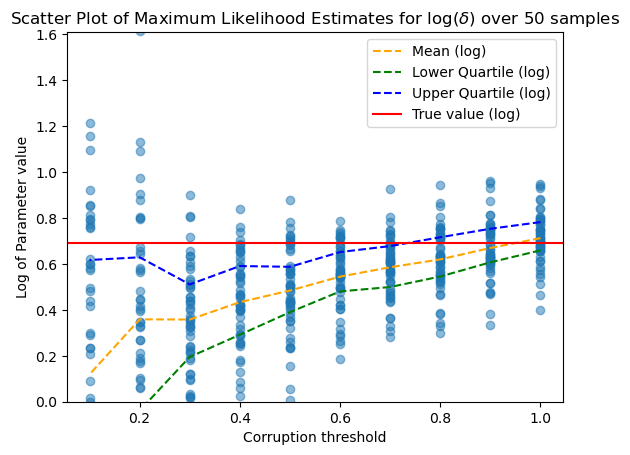

In [306]:
# Compute statistics
mean_values = np.mean(np.log(param_estimates[:, :, 2]), axis=0)
lower_quartile_values = np.percentile(np.log(param_estimates[:, :, 2]), 25, axis=0)
upper_quartile_values = np.percentile(np.log(param_estimates[:, :, 2]), 75, axis=0)

# Plot the log of parameter values
plt.scatter(np.tile(corruption_thresholds, num_samples), np.log(param_estimates[:, :, 2]).ravel(), alpha=0.5)
plt.plot(corruption_thresholds, mean_values, label='Mean (log)', linestyle='--', color='orange')
plt.plot(corruption_thresholds, lower_quartile_values, label='Lower Quartile (log)', linestyle='--', color='green')
plt.plot(corruption_thresholds, upper_quartile_values, label='Upper Quartile (log)', linestyle='--', color='blue')
plt.axhline(np.log(2), label='True value (log)', color='red')

plt.xlabel('Corruption threshold')
plt.ylabel('Log of Parameter value')
plt.title(r'Scatter Plot of Maximum Likelihood Estimates for $\log(\delta)$ over 50 samples')
plt.legend()
plt.ylim(0, np.log(5))  # Adjust the y-axis limits accordingly
plt.show()


What is going on probably makes a lot of sense. Need to look at way Hawkes process is generated (or simulated) and what randomly accepting or rejecting an event does to the overall process. What is an equivalent representation of this?

### Missing over different intervals

#### Missingness at start

Fixed p=0.5

Change length of corruption interval by varying end of interval

In [69]:
max_T = 1000
num_samples = 50
hawkes_realisations = []

master_seed = 147638114224523897606519673211969767073
seed_seq_master = np.random.SeedSequence(master_seed)

for i in range(num_samples):

    child_seed = seed_seq_master.spawn(1)[0]

    hawkes_realisation = sample_hawkes_process_thinning_true_vectorised(max_T, constant_background, exp_kernel_vectorised, seed=child_seed)
    hawkes_realisations.append(hawkes_realisation)

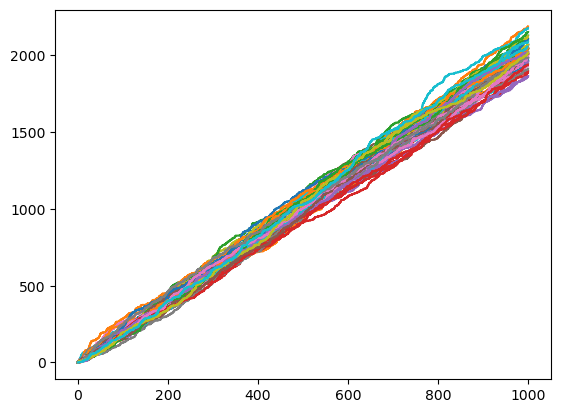

In [34]:
for h in hawkes_realisations:
    h = [0] + h
    counts = np.arange(len(h))
    plt.step(h, counts, where='post')
plt.show()

In [82]:
rng = np.random.default_rng(seed=master_seed)

random_label_lists = []

for realisation in hawkes_realisations:
    random_labels = rng.uniform(size=len(realisation))
    random_label_lists.append(random_labels)

In [35]:
step_size = 200
corruption_ends = np.arange(step_size, max_T+step_size, step_size)
param_estimates = np.zeros((num_samples, len(corruption_ends), 3))

In [85]:
starting_values = [0.5,0.5,0.5]

for i in range(num_samples):
    realisation = hawkes_realisations[i]
    random_labels = random_label_lists[i]
    print(f"Starting MLE for realisation {i}")
    for j, t_end in enumerate(corruption_ends):
        corrupted_realisation = corrupt_realisation(realisation, random_labels, p=0.5, time_start=0, time_end=t_end)
        data = corrupted_realisation, max_T
        current_params, _ = optimise_params(data, starting_values, 1e-6)
        param_estimates[i, j, :] = current_params

Starting MLE for realisation 0
Starting MLE for realisation 1
Starting MLE for realisation 2
Starting MLE for realisation 3
Starting MLE for realisation 4
Starting MLE for realisation 5
Starting MLE for realisation 6
Starting MLE for realisation 7
Starting MLE for realisation 8
Starting MLE for realisation 9
Starting MLE for realisation 10
Starting MLE for realisation 11
Starting MLE for realisation 12
Starting MLE for realisation 13
Starting MLE for realisation 14
Starting MLE for realisation 15
Starting MLE for realisation 16
Starting MLE for realisation 17
Starting MLE for realisation 18
Starting MLE for realisation 19
Starting MLE for realisation 20
Starting MLE for realisation 21
Starting MLE for realisation 22
Starting MLE for realisation 23
Starting MLE for realisation 24
Starting MLE for realisation 25
Starting MLE for realisation 26
Starting MLE for realisation 27
Starting MLE for realisation 28
Starting MLE for realisation 29
Starting MLE for realisation 30
Starting MLE for r

In [88]:
# Starting vals 0.5 for all
# max_T = 1000
# t_start = 0
# p = 0.5
# t_end incremented by step_size = 200
# seed = 147638114224523897606519673211969767073 # used for generating hawkes and random labels

# np.save('missingness_fixed_p_varying_end_march12.npy', param_estimates)

In [36]:
param_estimates = np.load('missingness_fixed_p_varying_end_march12.npy')

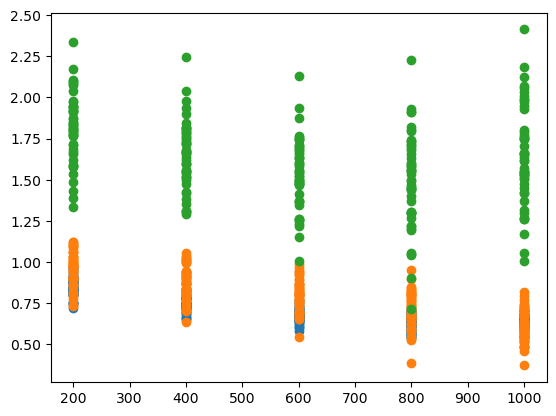

In [37]:
[plt.scatter(np.tile(corruption_ends, num_samples), param_estimates[:, :, i].ravel(), label=f'Parameter {i + 1}') for i in range(3)]

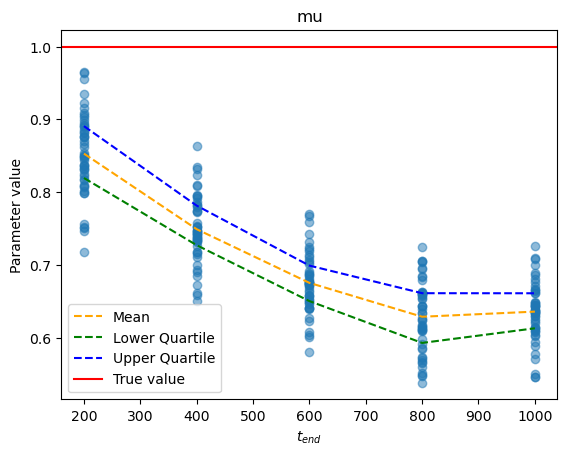

In [40]:
mean_values = np.mean(param_estimates[:, :, 0], axis=0)
lower_quartile_values = np.percentile(param_estimates[:, :, 0], 25, axis=0)
upper_quartile_values = np.percentile(param_estimates[:, :, 0], 75, axis=0)

plt.scatter(np.tile(corruption_ends, num_samples), param_estimates[:, :, 0].ravel(), alpha=0.5)
plt.plot(corruption_ends, mean_values, label='Mean', linestyle='--', color='orange')
plt.plot(corruption_ends, lower_quartile_values, label='Lower Quartile', linestyle='--', color='green')
plt.plot(corruption_ends, upper_quartile_values, label='Upper Quartile', linestyle='--', color='blue')
plt.axhline(1, label='True value', color='red')

plt.xlabel('$t_{end}$')
plt.ylabel('Parameter value')
# plt.title('Scatter Plot of Maximum Likelihood Estimates for $\mu$ over 50 samples')
plt.title('mu')
plt.legend()
plt.show()

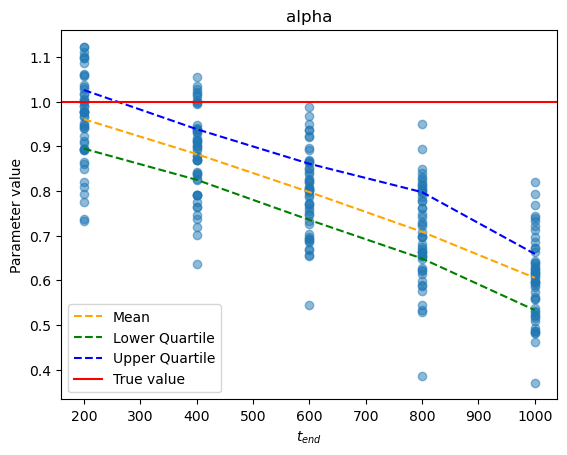

In [41]:
mean_values = np.mean(param_estimates[:, :, 1], axis=0)
lower_quartile_values = np.percentile(param_estimates[:, :, 1], 25, axis=0)
upper_quartile_values = np.percentile(param_estimates[:, :, 1], 75, axis=0)

plt.scatter(np.tile(corruption_ends, num_samples), param_estimates[:, :, 1].ravel(), alpha=0.5)
plt.plot(corruption_ends, mean_values, label='Mean', linestyle='--', color='orange')
plt.plot(corruption_ends, lower_quartile_values, label='Lower Quartile', linestyle='--', color='green')
plt.plot(corruption_ends, upper_quartile_values, label='Upper Quartile', linestyle='--', color='blue')
plt.axhline(1, label='True value', color='red')

plt.xlabel('$t_{end}$')
plt.ylabel('Parameter value')
# plt.title(r'Scatter Plot of Maximum Likelihood Estimates for $\alpha$ over 50 samples')
plt.title('alpha')
plt.legend()
plt.show()

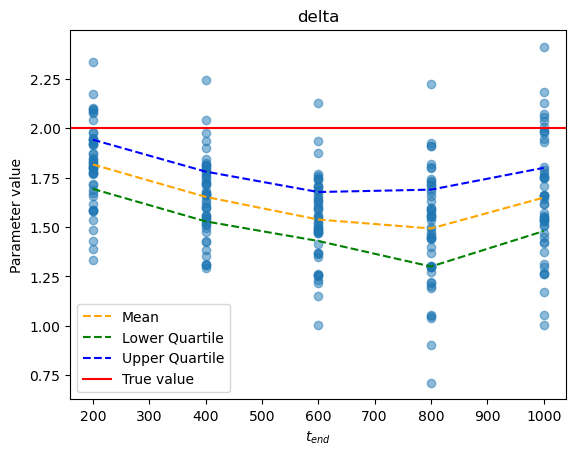

In [42]:
mean_values = np.mean(param_estimates[:, :, 2], axis=0)
lower_quartile_values = np.percentile(param_estimates[:, :, 2], 25, axis=0)
upper_quartile_values = np.percentile(param_estimates[:, :, 2], 75, axis=0)

plt.scatter(np.tile(corruption_ends, num_samples), param_estimates[:, :, 2].ravel(), alpha=0.5)
plt.plot(corruption_ends, mean_values, label='Mean', linestyle='--', color='orange')
plt.plot(corruption_ends, lower_quartile_values, label='Lower Quartile', linestyle='--', color='green')
plt.plot(corruption_ends, upper_quartile_values, label='Upper Quartile', linestyle='--', color='blue')
plt.axhline(2, label='True value', color='red')

plt.xlabel('$t_{end}$')
plt.ylabel('Parameter value')
# plt.title('Scatter Plot of Maximum Likelihood Estimates for $\delta$ over 50 samples')
plt.title('delta')
plt.legend()
plt.show()

#### Missingness at end

Fixed p=0.5

Change length of corruption interval by varying start of interval

In [32]:
max_T = 1000
num_samples = 50
hawkes_realisations = []

master_seed = 147638114224523897606519673211969767073
seed_seq_master = np.random.SeedSequence(master_seed)

for i in range(num_samples):

    child_seed = seed_seq_master.spawn(1)[0]

    hawkes_realisation = sample_hawkes_process_thinning_true_vectorised(max_T, constant_background, exp_kernel_vectorised, seed=child_seed)
    hawkes_realisations.append(hawkes_realisation)

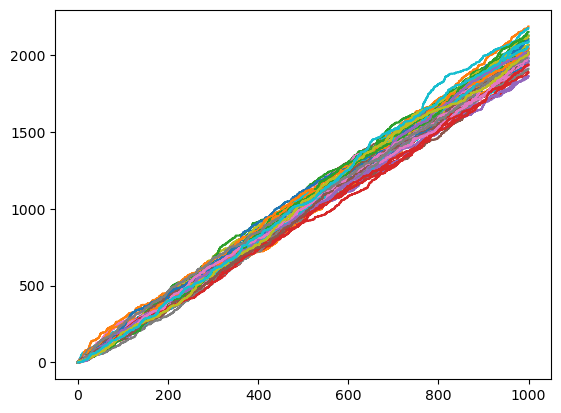

In [33]:
for h in hawkes_realisations:
    h = [0] + h
    counts = np.arange(len(h))
    plt.step(h, counts, where='post')
plt.show()

In [34]:
rng = np.random.default_rng(seed=master_seed)

random_label_lists = []

for realisation in hawkes_realisations:
    random_labels = rng.uniform(size=len(realisation))
    random_label_lists.append(random_labels)

In [35]:
step_size = 200
corruption_starts = np.arange(0, max_T, step_size)
print(corruption_starts)
param_estimates = np.zeros((num_samples, len(corruption_starts), 3))

[  0 200 400 600 800]


In [101]:
starting_values = [0.5,0.5,0.5]

for i in range(num_samples):
    realisation = hawkes_realisations[i]
    random_labels = random_label_lists[i]
    print(f"Starting MLE for realisation {i}")
    for j, t_start in enumerate(corruption_starts):
        corrupted_realisation = corrupt_realisation(realisation, random_labels, p=0.5, time_start=t_start, time_end=max_T)
        data = corrupted_realisation, max_T
        current_params, _ = optimise_params(data, starting_values, 1e-6)
        param_estimates[i, j, :] = current_params

Starting MLE for realisation 0
Starting MLE for realisation 1
Starting MLE for realisation 2
Starting MLE for realisation 3
Starting MLE for realisation 4
Starting MLE for realisation 5
Starting MLE for realisation 6
Starting MLE for realisation 7
Starting MLE for realisation 8
Starting MLE for realisation 9
Starting MLE for realisation 10
Starting MLE for realisation 11
Starting MLE for realisation 12
Starting MLE for realisation 13
Starting MLE for realisation 14
Starting MLE for realisation 15
Starting MLE for realisation 16
Starting MLE for realisation 17
Starting MLE for realisation 18
Starting MLE for realisation 19
Starting MLE for realisation 20
Starting MLE for realisation 21
Starting MLE for realisation 22
Starting MLE for realisation 23
Starting MLE for realisation 24
Starting MLE for realisation 25
Starting MLE for realisation 26
Starting MLE for realisation 27
Starting MLE for realisation 28
Starting MLE for realisation 29
Starting MLE for realisation 30
Starting MLE for r

In [103]:
# Starting vals 0.5 for all
# max_T = 1000
# t_end = 1000
# p = 0.5
# t_start incremented by step_size = 200
# seed = 147638114224523897606519673211969767073 # used for generating hawkes and random labels

# np.save('missingness_fixed_p_varying_start_march12.npy', param_estimates)

In [36]:
param_estimates = np.load('missingness_fixed_p_varying_start_march12.npy')

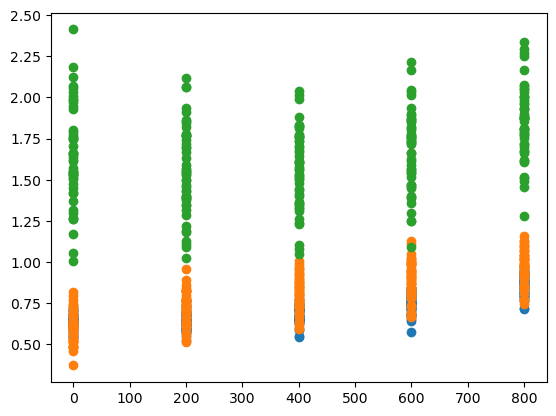

In [37]:
[plt.scatter(np.tile(corruption_starts, num_samples), param_estimates[:, :, i].ravel(), label=f'Parameter {i + 1}') for i in range(3)]

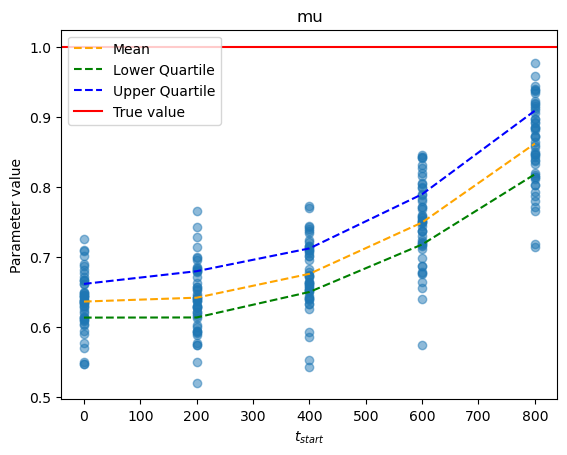

In [38]:
mean_values = np.mean(param_estimates[:, :, 0], axis=0)
lower_quartile_values = np.percentile(param_estimates[:, :, 0], 25, axis=0)
upper_quartile_values = np.percentile(param_estimates[:, :, 0], 75, axis=0)

plt.scatter(np.tile(corruption_starts, num_samples), param_estimates[:, :, 0].ravel(), alpha=0.5)
plt.plot(corruption_starts, mean_values, label='Mean', linestyle='--', color='orange')
plt.plot(corruption_starts, lower_quartile_values, label='Lower Quartile', linestyle='--', color='green')
plt.plot(corruption_starts, upper_quartile_values, label='Upper Quartile', linestyle='--', color='blue')
plt.axhline(1, label='True value', color='red')

plt.xlabel('$t_{start}$')
plt.ylabel('Parameter value')
# plt.title('Scatter Plot of Maximum Likelihood Estimates for $\mu$ over 50 samples')
plt.title('mu')
plt.legend()
plt.show()

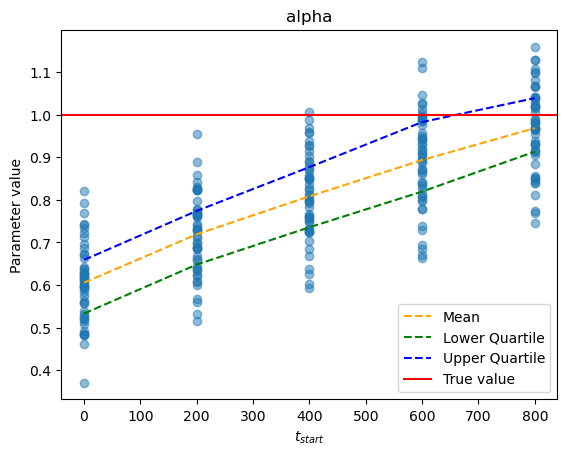

In [39]:
mean_values = np.mean(param_estimates[:, :, 1], axis=0)
lower_quartile_values = np.percentile(param_estimates[:, :, 1], 25, axis=0)
upper_quartile_values = np.percentile(param_estimates[:, :, 1], 75, axis=0)

plt.scatter(np.tile(corruption_starts, num_samples), param_estimates[:, :, 1].ravel(), alpha=0.5)
plt.plot(corruption_starts, mean_values, label='Mean', linestyle='--', color='orange')
plt.plot(corruption_starts, lower_quartile_values, label='Lower Quartile', linestyle='--', color='green')
plt.plot(corruption_starts, upper_quartile_values, label='Upper Quartile', linestyle='--', color='blue')
plt.axhline(1, label='True value', color='red')

plt.xlabel('$t_{start}$')
plt.ylabel('Parameter value')
# plt.title(r'Scatter Plot of Maximum Likelihood Estimates for $\alpha$ over 50 samples')
plt.title('alpha')
plt.legend()
plt.show()

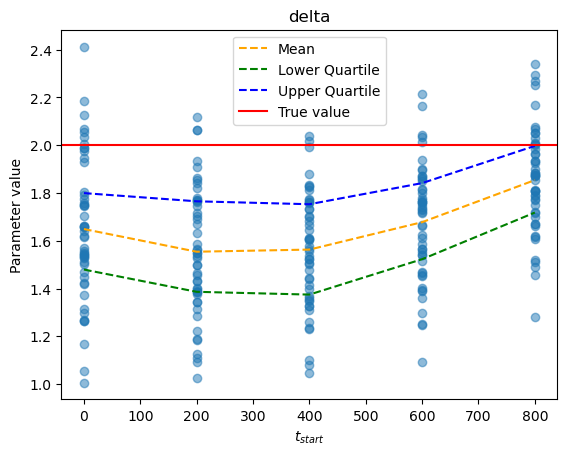

In [40]:
mean_values = np.mean(param_estimates[:, :, 2], axis=0)
lower_quartile_values = np.percentile(param_estimates[:, :, 2], 25, axis=0)
upper_quartile_values = np.percentile(param_estimates[:, :, 2], 75, axis=0)

plt.scatter(np.tile(corruption_starts, num_samples), param_estimates[:, :, 2].ravel(), alpha=0.5)
plt.plot(corruption_starts, mean_values, label='Mean', linestyle='--', color='orange')
plt.plot(corruption_starts, lower_quartile_values, label='Lower Quartile', linestyle='--', color='green')
plt.plot(corruption_starts, upper_quartile_values, label='Upper Quartile', linestyle='--', color='blue')
plt.axhline(2, label='True value', color='red')

plt.xlabel('$t_{start}$')
plt.ylabel('Parameter value')
# plt.title('Scatter Plot of Maximum Likelihood Estimates for $\delta$ over 50 samples')
plt.title('delta')
plt.legend()
plt.show()

Interesting behaviour going on with delta, in both this and previous seems to decrease before increasing again.